Duomenų analitikos baigiamasis darbas.

Išsikeltas klausimas, ar filmo pajamos/pelnas bei populiarumas ir įvertinimas priklauso nuo pagrindinio aktoriaus lyties. Kaip vidutiniškai priklauso filmo biudžetas nuo filmo trukmės

Atsakymai pateikti apskaičiavus pasitelkus paskaitose išmokta teorija ir apskaičiuota naudantis tiek SQL užklausų importavimu, tiek Python bibliotekomis bei jų funkcijomis.

Kaggle duomenys: https://www.kaggle.com/datasets/akshaydattatraykhare/movies-dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt
import pandas as pd


In [5]:
DB = cnt.connect(
    host = "localhost",
    user = "root",
    password = "xxx",
    port = 3317
)

# DB.close()

c = DB.cursor()

In [6]:
c.execute("use nauja")
c.execute("show tables")
ats = c.fetchall()

print(ats)

[('aktoriai',), ('filmai',), ('filmai1',), ('skaiciai',)]


In [7]:
sql = '''select
avg(revenue)
from filmai
where {} = {}
group by {}'''

def vidurkis(aktoriauseile,reiksme):
    c.execute(sql.format(aktoriauseile,reiksme,aktoriauseile))
    ats = c.fetchall()
    avg = (ats[0][0])/1000000
    return avg

avgM1 = vidurkis("lytis1","1",)
print("Pagrindine aktore moteris ", avgM1)

avgV1 = vidurkis("lytis1","2")
print("Pagrindinis aktorius vyras ",avgV1)

avgM2 = vidurkis("lytis2","1")
print("Antraeile aktore moteris ", avgM2)

avgV2 = vidurkis("lytis2","2")
print("Antraeilis aktorius vyras ", avgV2)

avgM3 = vidurkis("lytis3","1")
print("Treciaeile aktore moteris ",avgM3)

avgV3 = vidurkis("lytis3","2")
print("Treciaeilis aktorius vyras ",avgV3)

avgM4 = vidurkis("lytis4","1")
print("Ketvirtaeile aktore moteris ",avgM4)

avgV4 = vidurkis("lytis4","2")
print("Ketvirtaeilis aktorius vyras ",avgV4)


Pagrindine aktore moteris  102.3626827472
Pagrindinis aktorius vyras  143.5696930298
Antraeile aktore moteris  127.4087753677
Antraeilis aktorius vyras  138.1699041466
Treciaeile aktore moteris  132.9952454112
Treciaeilis aktorius vyras  134.2858495683
Ketvirtaeile aktore moteris  124.869030238
Ketvirtaeilis aktorius vyras  138.5063012046


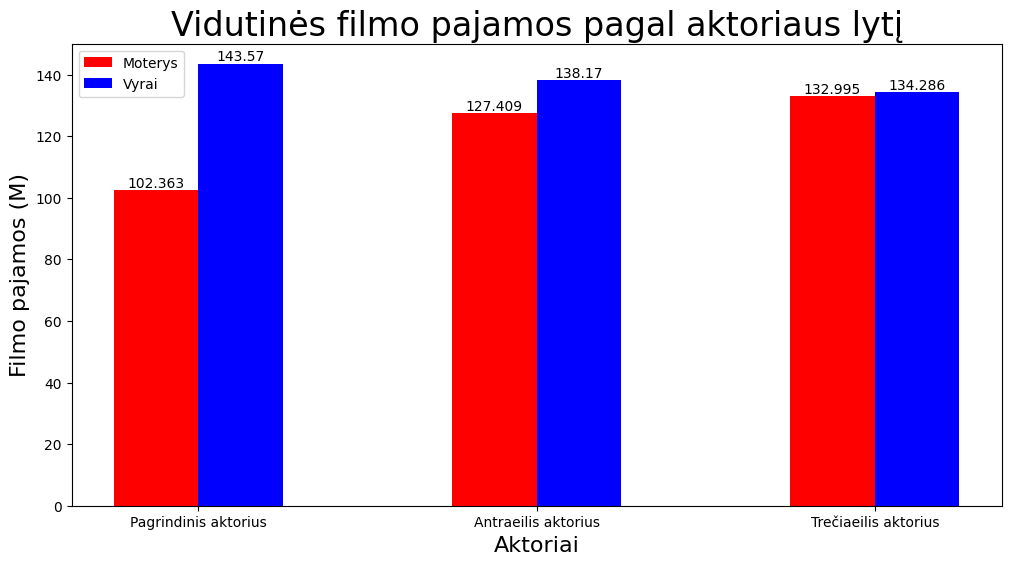

In [27]:
x = np.asarray([1,2,3])
y1 = [avgM1, avgM2, avgM3]
y2 = [avgV1, avgV2, avgV3]

w=0.25
fig, ax, = plt.subplots(1, figsize=(12,6))
ax.bar(x-w/2, y1, width=w, label='Moterys', color = "red")
ax.bar(x+w/2, y2, width=w, label='Vyrai', color = "Blue")

ax.set_xticks(x)
ax.set_xticklabels(['Pagrindinis aktorius', 'Antraeilis aktorius', "Trečiaeilis aktorius"])
ax.legend(loc=0)
ax.set_ylim([0, 150])

ax.set_xlabel("Aktoriai", fontsize = 16)
ax.set_ylabel("Filmo pajamos (M)", fontsize = 16)
ax.set_title("Vidutinės filmo pajamos pagal aktoriaus lytį", fontsize = 24)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()


In [9]:
sql='''select 
lytis1,
avg((revenue-budget)/budget)
from filmai
group by lytis1'''
c.execute(sql)
ats = c.fetchall()

lytis = []
atsiperkamumas = []
for eilute in ats:
    lytis.append(eilute[0])
    atsiperkamumas.append(eilute[1])

print(lytis)
print(atsiperkamumas)

# sql='''select 
# lytis1,
# avg(vote_average)
# from filmai
# group by lytis1'''
# c.execute(sql)
# ats = c.fetchall()

# balsuvidurkis = []
# for eilute in ats:
#     lytis.append(eilute[0])
#     balsuvidurkis.append(eilute[1])

# print(balsuvidurkis)

# sql='''select 
# lytis1,
# avg(popularity)
# from filmai
# group by lytis1'''
# c.execute(sql)
# ats = c.fetchall()

# populiarumas = []
# for eilute in ats:
#     lytis.append(eilute[0])
#     populiarumas.append(eilute[1])

# print(populiarumas)

[2, 1]
[Decimal('5.86903384'), Decimal('24.98805381')]


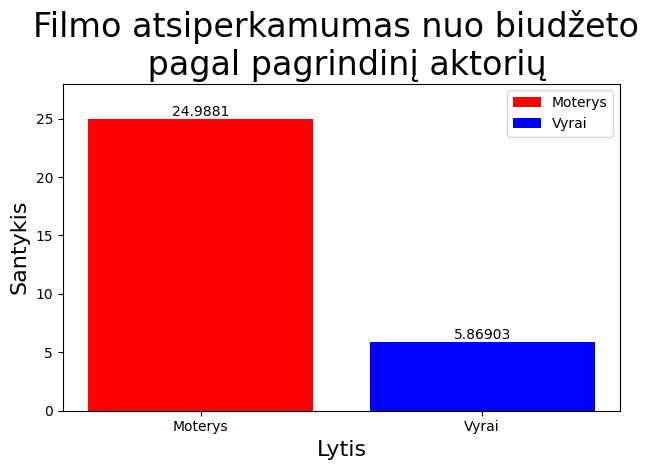

In [10]:
x = np.asarray([1,2])
fig, ax, = plt.subplots()
ax.bar(x[0], atsiperkamumas[1], label='Moterys', color = "red")
ax.bar(x[1], atsiperkamumas[0], label='Vyrai', color = "Blue")

ax.set_xticks(x)
ax.set_xticklabels(['Moterys', 'Vyrai'])
ax.legend()
ax.set_ylim([0, 28])

ax.set_xlabel("Lytis", fontsize = 16)
ax.set_ylabel("Santykis", fontsize = 16)
ax.set_title("Filmo atsiperkamumas nuo biudžeto \n pagal pagrindinį aktorių", fontsize = 24)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


fig.tight_layout()

plt.show()

In [11]:
aktoriai = pd.DataFrame(pd.read_csv("aktoriai.csv"))
skaiciai = pd.DataFrame(pd.read_csv("tmdb_5000_movies.csv"))

In [12]:
filmai = aktoriai.merge(skaiciai, how="inner",left_on="movie_id",right_on="id")

In [13]:
filmaigr = filmai.groupby("lytis1")
filmaigr.groups.keys()

dict_keys([1, 2])

In [14]:
populiarumas = []
ivertinimas=[]
for lyt in filmaigr.groups.keys():
    populiarumas.append(filmaigr.get_group(lyt)["popularity"].values)
    ivertinimas.append(filmaigr.get_group(lyt)["vote_average"].values)

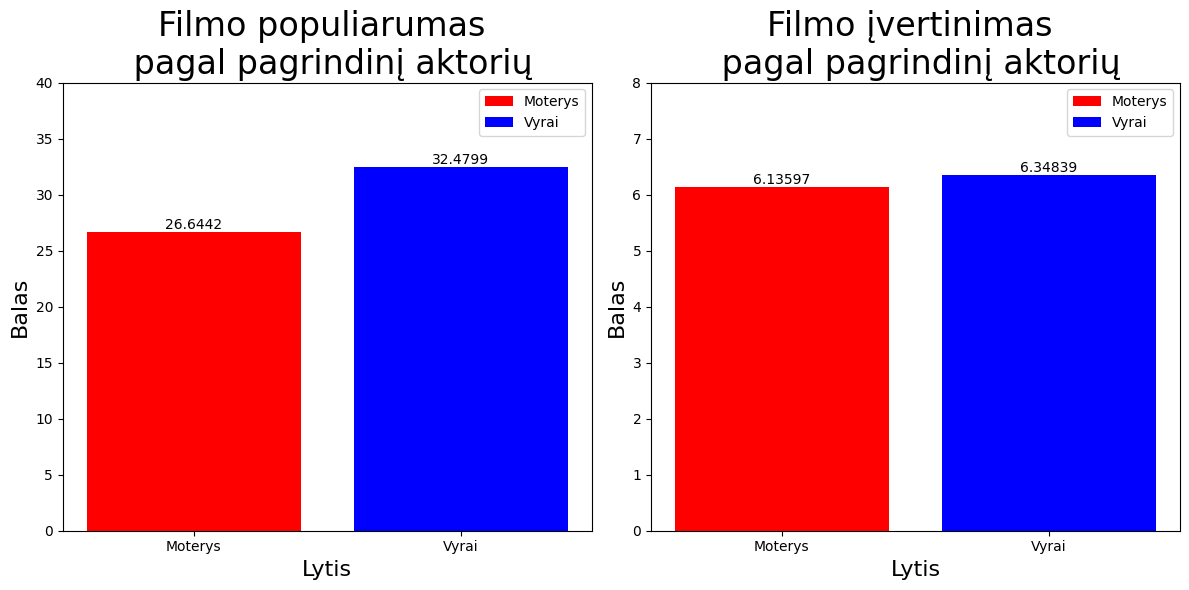

In [15]:
x = np.asarray([1,2])
fig, (ax, ax1) = plt.subplots(1,2, figsize=(12,6))
ax.bar(x[0], populiarumas[0].mean(), label='Moterys', color = "red")
ax.bar(x[1], populiarumas[1].mean(), label='Vyrai', color = "Blue")

ax.set_xticks(x)
ax.set_xticklabels(['Moterys', 'Vyrai'])
ax.legend()
ax.set_ylim([0, 40])

ax.set_xlabel("Lytis", fontsize = 16)
ax.set_ylabel("Balas", fontsize = 16)
ax.set_title("Filmo populiarumas \n pagal pagrindinį aktorių", fontsize = 24)

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


ax1.bar(x[0], ivertinimas[0].mean(), label='Moterys', color = "red")
ax1.bar(x[1], ivertinimas[1].mean(), label='Vyrai', color = "Blue")
ax1.set_xticks(x)
ax1.set_xticklabels(['Moterys', 'Vyrai'])
ax1.legend()
ax1.set_ylim([0, 8])


ax1.set_xlabel("Lytis", fontsize = 16)
ax1.set_ylabel("Balas", fontsize = 16)
ax1.set_title("Filmo įvertinimas \n pagal pagrindinį aktorių", fontsize = 24)

ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])


fig.tight_layout()

plt.show()

In [16]:
sql='''select
avg(budget),
runtime
from skaiciai
group by runtime
order by runtime'''
c.execute(sql)
ats = c.fetchall()

runtime =[]
biudzetas = []
for eilute in ats:
    runtime.append(eilute[1])
    biudzetas.append(eilute[0]/1000000)


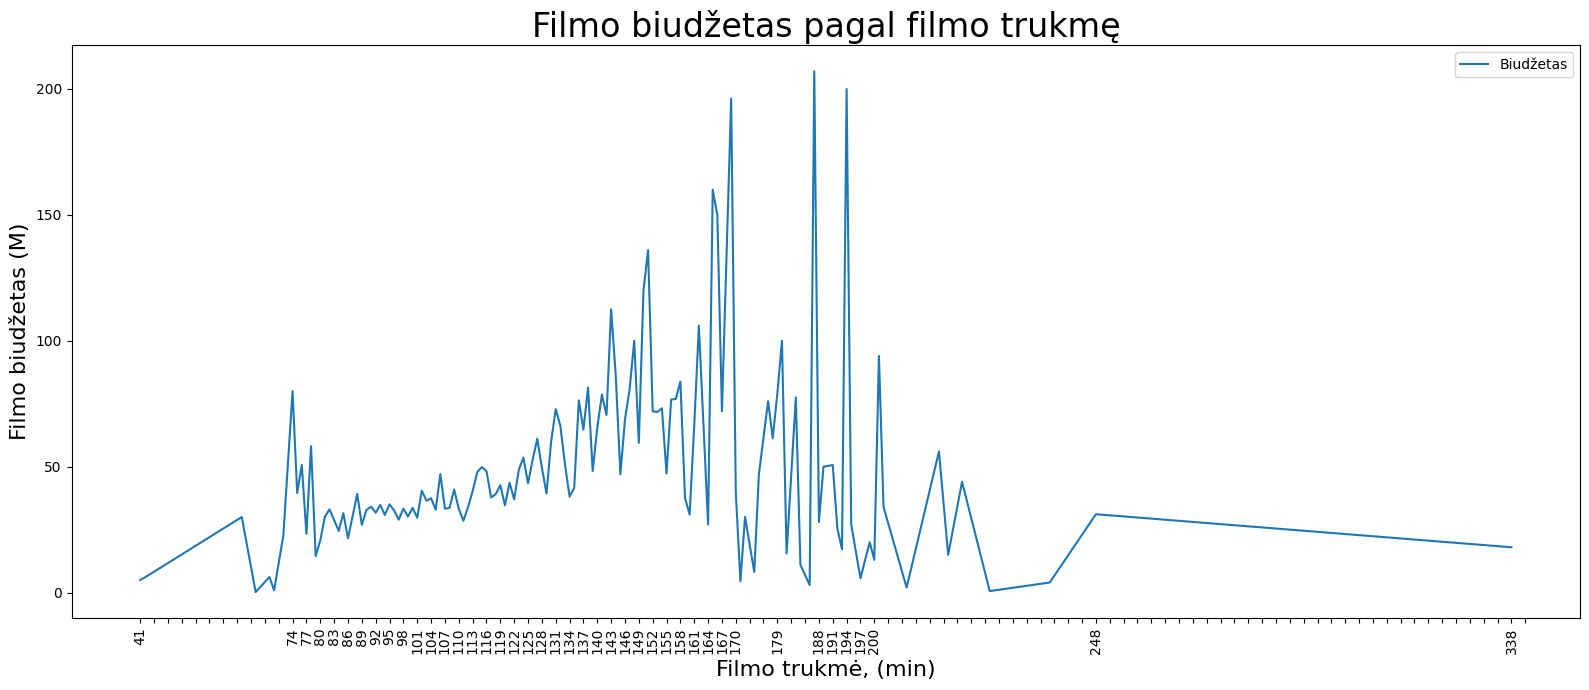

In [18]:
x = np.asarray(runtime)

fig, ax = plt.subplots(figsize=(16,7))

ax.plot(x, biudzetas, label = "Biudžetas")

ax.set_xticks(x)
ax.set_xticklabels(runtime)

ax.tick_params(axis='x', labelrotation=90)

plt.xticks(np.arange(min(x), max(x)+5, 3))

ax.legend()

ax.set_xlabel("Filmo trukmė, (min)", fontsize = 16)
ax.set_ylabel("Filmo biudžetas (M)", fontsize = 16)
ax.set_title("Filmo biudžetas pagal filmo trukmę", fontsize = 24)

fig.tight_layout()

plt.show()